# House Price Prediction

## Load the Dataset

In [1]:
# Libraries for pycaret
from pycaret.datasets import get_data
from pycaret.time_series import *

In [2]:
# Load dataset boston
data = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Schema Data : [Link](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names)

1. CRIM     :   per capita crime rate by town
2. ZN       :   proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS    :   proportion of non-retail business acres per town
4. CHAS     :   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX      :   nitric oxides concentration (parts per 10 million)
6. RM       :   average number of rooms per dwelling
7. AGE      :   proportion of owner-occupied units built prior to 1940
8. DIS      :   weighted distances to five Boston employment centres
9. RAD      :   index of accessibility to radial highways
10. TAX     :   full-value property-tax rate per $10,000
11. PTRATIO :   pupil-teacher ratio by town
12. B       :   1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT   :   % lower status of the population
14. MEDV    :   Median value of owner-occupied homes in $1000's

In this project, MEDV variable will be target for price prediction

## Exploratory Data Analysis

In [ ]:
# Getting information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Based on information, the dataset have 506 entries with data type float and interger. Then, the dataset has 14 column.

In [10]:
# Checking for missing value
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

There is no missing value in the dataset.

In [11]:
# Display basic statistics of dataset
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Display statistics about all columns in the dataset

In [13]:
# Find outlier in the dataset
def Find_Outliers(data):

    try:
        num_cols= data.select_dtypes(include=['number']).columns # Getting numerical data
        outlier_indicates = set()

        for col in num_cols:
            q1 = data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            IQR = q3 - q1
            lowerbound = q1 - (IQR * 1.5)
            upperbound = q3 + (IQR * 1.5)

        # Cara indeks dari baris yang memiliki outlier

        outlier_indicates.update(data[(data[col] < lowerbound) | (data[col] > upperbound)].index)

        outliers = data.loc[list(outlier_indicates)]
        return outliers

    except Exception as e:
        print(f"Error: {e}")
        return None
    
outliers = Find_Outliers(data)
print(f'Number of outliers: {len(outliers)}')
print('Max outlier value:\n', outliers.max(numeric_only=True))
print('Min outlier value:\n', outliers.min(numeric_only=True))

Number of outliers: 40
Max outlier value:
 crim        67.9208
zn          95.0000
indus       19.5800
chas         1.0000
nox          0.6930
rm           8.7250
age        100.0000
dis          8.9067
rad         24.0000
tax        666.0000
ptratio     20.2000
black      396.9000
lstat       30.5900
medv        50.0000
dtype: float64
Min outlier value:
 crim         0.01381
zn           0.00000
indus        0.46000
chas         0.00000
nox          0.39400
rm           4.97000
age          8.40000
dis          1.12960
rad          1.00000
tax        193.00000
ptratio     13.00000
black      347.88000
lstat        1.73000
medv         5.00000
dtype: float64


Based on the information from the func, we can see that all columns has a outlier.

<Axes: >

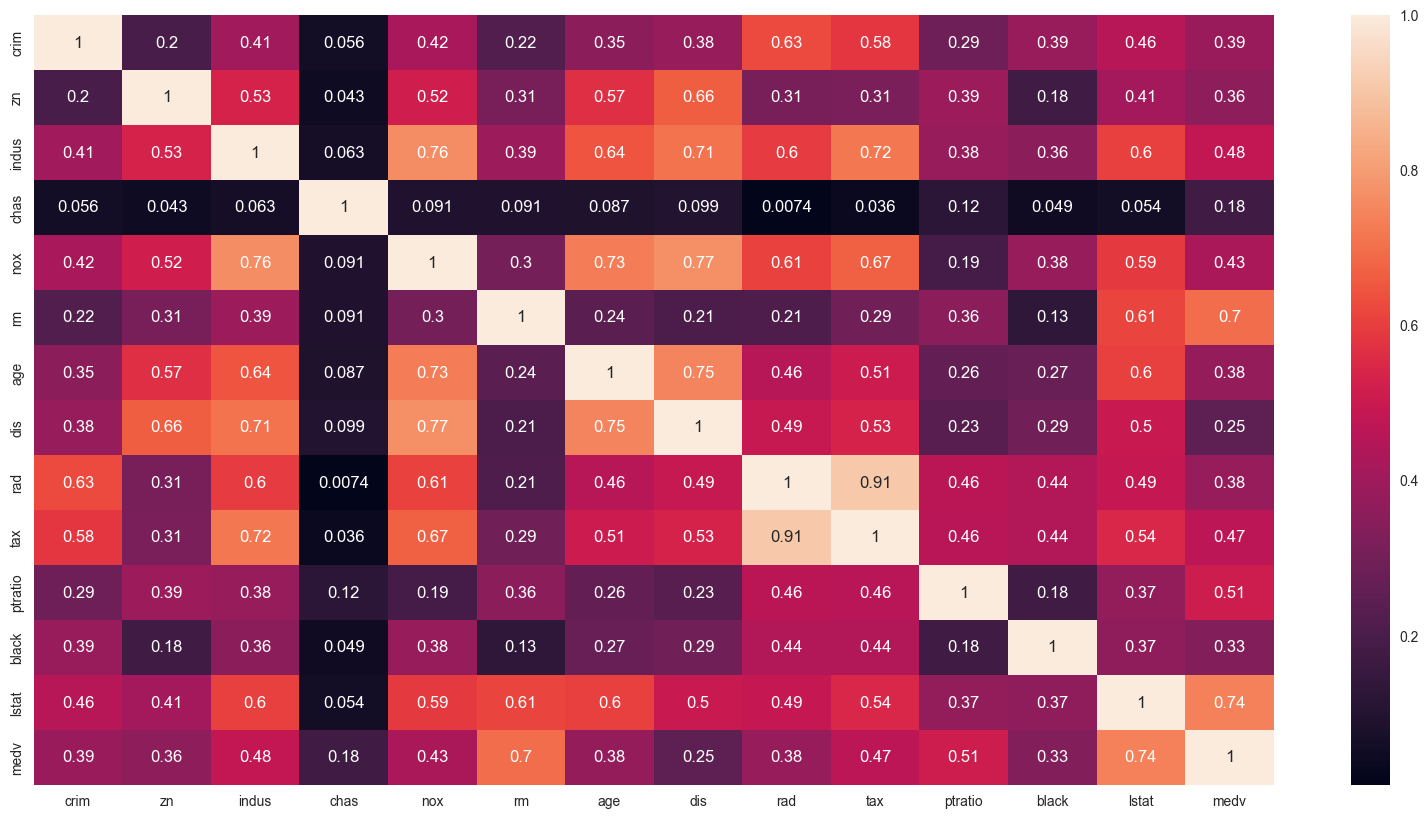

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

sns.heatmap(data.corr().abs(),  annot=True)

Based on the correlation of the visualization, we can see that lstat, m, and ptr have a correlation above 0,5 than the other variable.

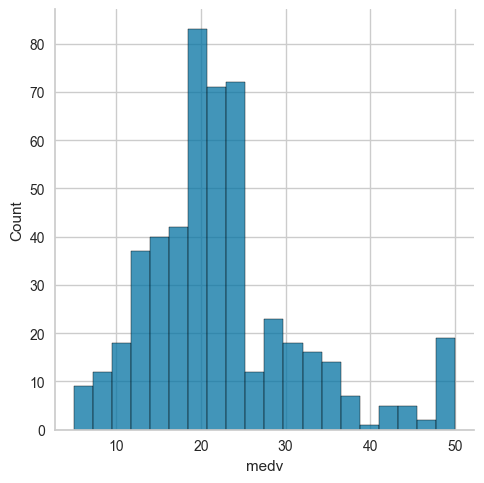

In [16]:
# Getting information about the distribution of medc
sns.displot(data, x="medv", bins=20)

Based on visualization, we can see the distribution of medv more inclined to the left or can be called negatively skewed (tails is longer on the right side).

## Data Preparation

In [20]:
from pycaret.regression import setup

# Setup inialization
s = setup(
    data, target='medv',
    numeric_imputation='mean',
    normalize=True,
    transformation=True,
    bin_numeric_features=['lstat','age']
)

,Description,Value
0,Session id,2011
1,Target,medv
2,Target type,Regression
3,Original data shape,"(506, 14)"
4,Transformed data shape,"(506, 14)"
5,Transformed train set shape,"(354, 14)"
6,Transformed test set shape,"(152, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


For setup preparation, we use target='medv' to specify the target column, numeric_imputation='mean' to replace missing values ​​with the mean, normalize=True to make all features on the same scale, and transformation=True to distribute the data more normally. In addition, bin_numeric_features=['lstat', 'age'] is used to transform numeric features into categories by dividing their values ​​into bins, which can improve model interpretability and performance. 

Lstat and age have a fairly wide distribution of the range = max - min calculation, which requires a binning feature.

##  Model Training

In [21]:
from pycaret.regression import compare_models

# Traing and compared other models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,2.2523,11.2297,3.2192,0.8769,0.1447,0.1123,0.6660
gbr,Gradient Boosting Regressor,2.3951,11.6638,3.3314,0.8661,0.1528,0.1210,0.0360
lightgbm,Light Gradient Boosting Machine,2.4136,14.3438,3.6216,0.8433,0.1653,0.1237,0.2510
rf,Random Forest Regressor,2.4353,13.3259,3.5561,0.8432,0.1587,0.1247,0.0680
et,Extra Trees Regressor,2.4674,14.0433,3.6134,0.8389,0.1551,0.1203,0.0490
xgboost,Extreme Gradient Boosting,2.5360,14.5844,3.6899,0.8301,0.1613,0.1254,0.1410
ada,AdaBoost Regressor,2.8799,17.2901,4.0390,0.8054,0.1874,0.1515,0.0290
knn,K Neighbors Regressor,3.3832,25.3183,4.9078,0.7158,0.2000,0.1597,0.0200
br,Bayesian Ridge,3.7087,26.0736,4.9986,0.7057,0.2331,0.1886,0.0160
ridge,Ridge Regression,3.7400,26.0798,5.0037,0.7043,0.2338,0.1904,0.0160


Conclusion based on the regression:

1. CatBoost Regressor is the best model, because it has lower error (MAE, MSE, RMSE) and the highest R² value (0.8769), which means it is able to explain the variation of the data well.

2. Boosting-based models (CatBoost, GBR, LightGBM, XGBoost, AdaBoost) tend to perform better than linear models (Linear Regression, Ridge, Lasso).

3. Linear regression models such as Linear Regression, Ridge, and Lasso have lower R² (~0.70), indicating that the linear approach is less suitable for this dataset.

## Model Evaluation

In [22]:
## Model evaluation using plot feature and residual

from pycaret.regression import plot_model


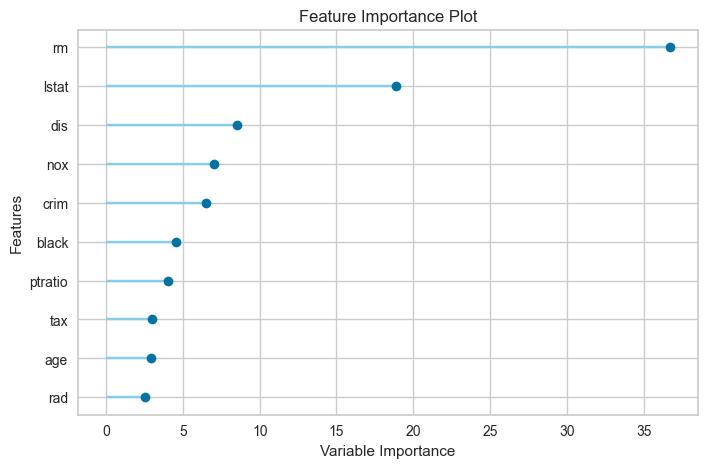

In [24]:
# Plot feature importance
plot_model(best_model, plot='feature')

Conclusion from Feature Importance Plot

The higher the "Variable Importance" value, the greater the influence of the feature in determining the target value (medv - median value of owner-occupied homes).

The "rm" feature has the largest influence, meaning that the average number of bedrooms in a house is the main factor in determining the price of a house.

The "lstat" feature also has a large influence, indicating that the higher the percentage of low-income residents in an area, the lower the median value of homes in that area.

Other features such as "dis" (distance to employment), "nox" (air pollution), and "crim" (crime rate) also contribute but with lower levels of importance.

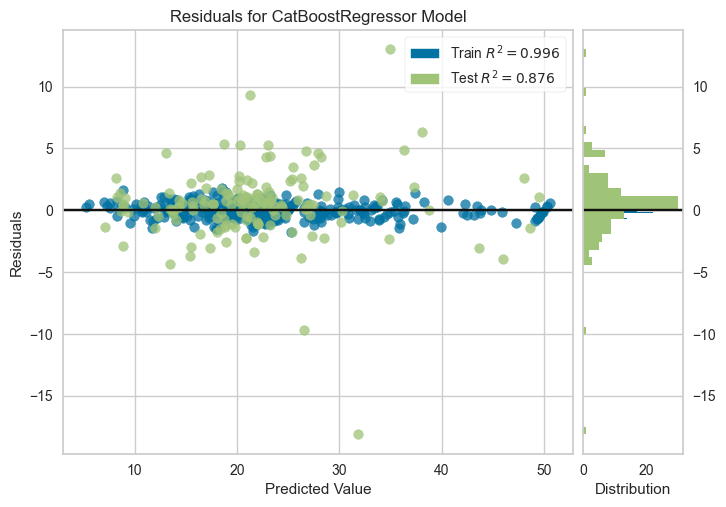

In [25]:
# Plot residual
plot_model(best_model, plot='residuals')

Conclusion from Residuals for Cat Boost Regressor Model :

1. In this graph, most of the residual points are around zero, indicating that the model has fairly small errors and no suspicious systematic patterns.

However, there are some extreme residuals, especially in the negative part (below -10), indicating some significant prediction errors.

2. The model performs very well on the training data, but slightly overfits due to the difference in R-squared between train and test.

3. The residual distribution is quite symmetric, indicating no suspicious error patterns.


## Conclusion

The CatBoost Regressor model shows very good performance in predicting training data and quite good on test data, with indications of overfitting that need attention. Further optimization is needed to improve model generalization and reduce errors on outliers.

The Boston house price dataset, where the medv variable is the dependent variable, is quite influenced by 2 independent variables based on the feature importance plot, namely rm (average number of rooms per house) and lstat (percentage of low-income status), so that these 2 variables are the main focus in predicting house prices compared to other variables in the dataset.